# Problem 2

In [1]:
import numpy as np
from scipy.sparse.linalg import LinearOperator

In [2]:
def T_filter(n,alpha):
    T = [[alpha / np.pi * np.exp(-alpha*(i**2 + j**2)) 
      for j in range(n) + range(-n+1, 0)] 
     for i in range(n) + range(-n+1, 0)]
    return np.fft.fft2(T)

In [3]:
def new_mv(n,alpha):
    def mv(v):
        V = np.reshape(v,(n,n))
        if n > 1:
            zeros_right = [[0]*n]*(n-1)
            zeros_bottom = [[0]*(n-1)]*(2*n-1)
            V = np.concatenate((V,zeros_right))
            V = np.concatenate((V,zeros_bottom),axis = 1)
        Tv = np.fft.ifft2(np.multiply(T_filter(n,alpha),np.fft.fft2(V)))
        Tv = Tv[:n,:n].reshape(n*n)
        return Tv
    return mv

In [4]:
def construct(n,alpha):
    mv = new_mv(n,alpha)
    T = LinearOperator((n*n,n*n),matvec = mv)
    return T
    

In [7]:
from scipy import misc
lena = misc.lena()
n = lena.shape[0]
lena_long = lena.reshape(n*n,1)
alpha = 1./100
T = construct(n,alpha)
convolved_lena = T.matvec(lena_long)
squared_convolved_lena = convolved_lena.reshape(n,n)

C:\Users\frike\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part


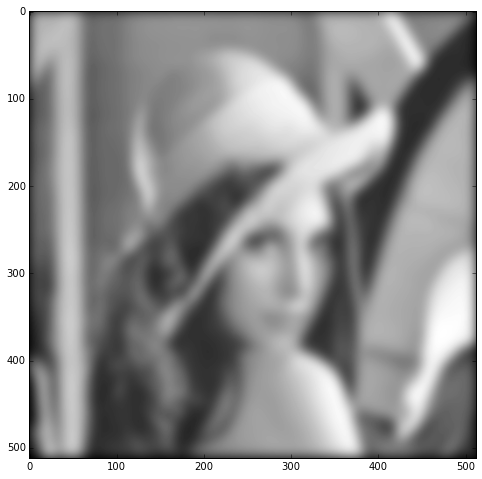

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
#convolved_lena = convolved_lena.astype(np.int64)
plt.imshow(squared_convolved_lena.astype(np.int64),cmap = 'gray')

In [28]:
import scipy.sparse.linalg as linalg
sol = linalg.gmres(T,convolved_lena,maxiter = 20)


In [33]:
sol2 = linalg.cg(T,convolved_lena,maxiter = 30)

C:\Users\frike\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


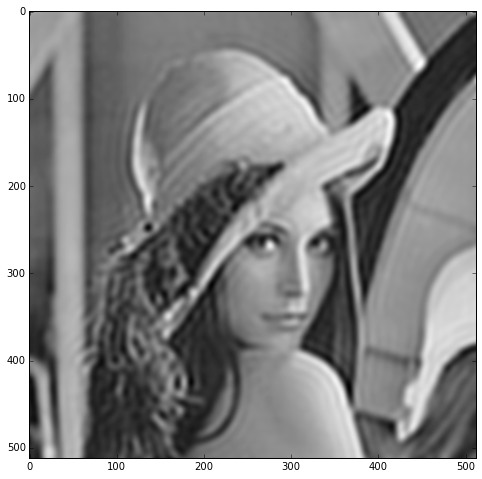

In [34]:
plt.figure(figsize=(8,8))
solution = np.array(sol[0])
solution = solution.reshape(n,n)
plt.imshow(solution.astype(np.int64),cmap = 'gray')

In [ ]:
alpha = 1./50.
T = construct(n,alpha)
convolved_lena = T.matvec(lena_long).reshape(n,n)

In [48]:
alphas = [1./100,1./50,1./20,1./10]
Ts = np.array([construct(n,alpha) for alpha in alphas])    

(4L,)


In [51]:
RHSs = [Ts[i].matvec(lena_long) for i in xrange(len(Ts))]

In [ ]:
res = [[]*len(Ts)]
for i in xrange(len(Ts)):
    sol = linalg.minres(Ts[i],lena_long,callback = res[i].append)
    plt.semilogy(res[i],label = 'alpha = {}'.format(alphas[i]))